<a href="https://colab.research.google.com/github/cs-iuu/ocr-2025-fall-cv/blob/main/notebooks/11.cnn_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 11. CNN Starter Code

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.9004 - loss: 0.3253 - val_accuracy: 0.9852 - val_loss: 0.0450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9848 - loss: 0.0494 - val_accuracy: 0.9863 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9899 - loss: 0.0315 - val_accuracy: 0.9898 - val_loss: 0.0299
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9921 - val_loss: 0.0274
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9924 - val_loss: 0.0256
313/313 - 3s - 9ms/step - accuracy: 0.9924 - loss: 0.0256

Test accuracy: 0.9924
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


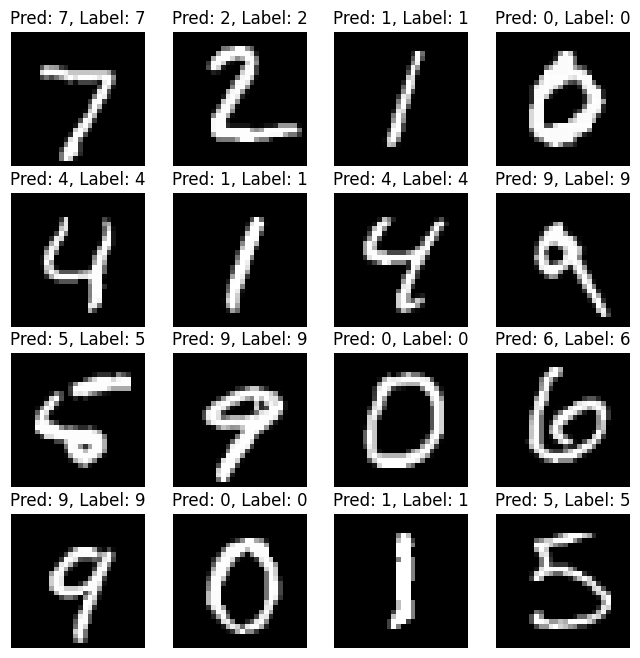

In [1]:
# ===============================
# CNN for Handwritten Digit Recognition (MNIST)
# ===============================

# 1️⃣ Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 2️⃣ Load and Prepare Data
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# MNIST images are 28x28 grayscale → reshape to (28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255.0

# 3️⃣ Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4️⃣ Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5️⃣ Train Model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# 6️⃣ Evaluate Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# 7️⃣ Visualize Some Predictions
predictions = model.predict(test_images[:16])

plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i].argmax()}, Label: {test_labels[i]}")
    plt.axis('off')
plt.show()


# Visualize the Model

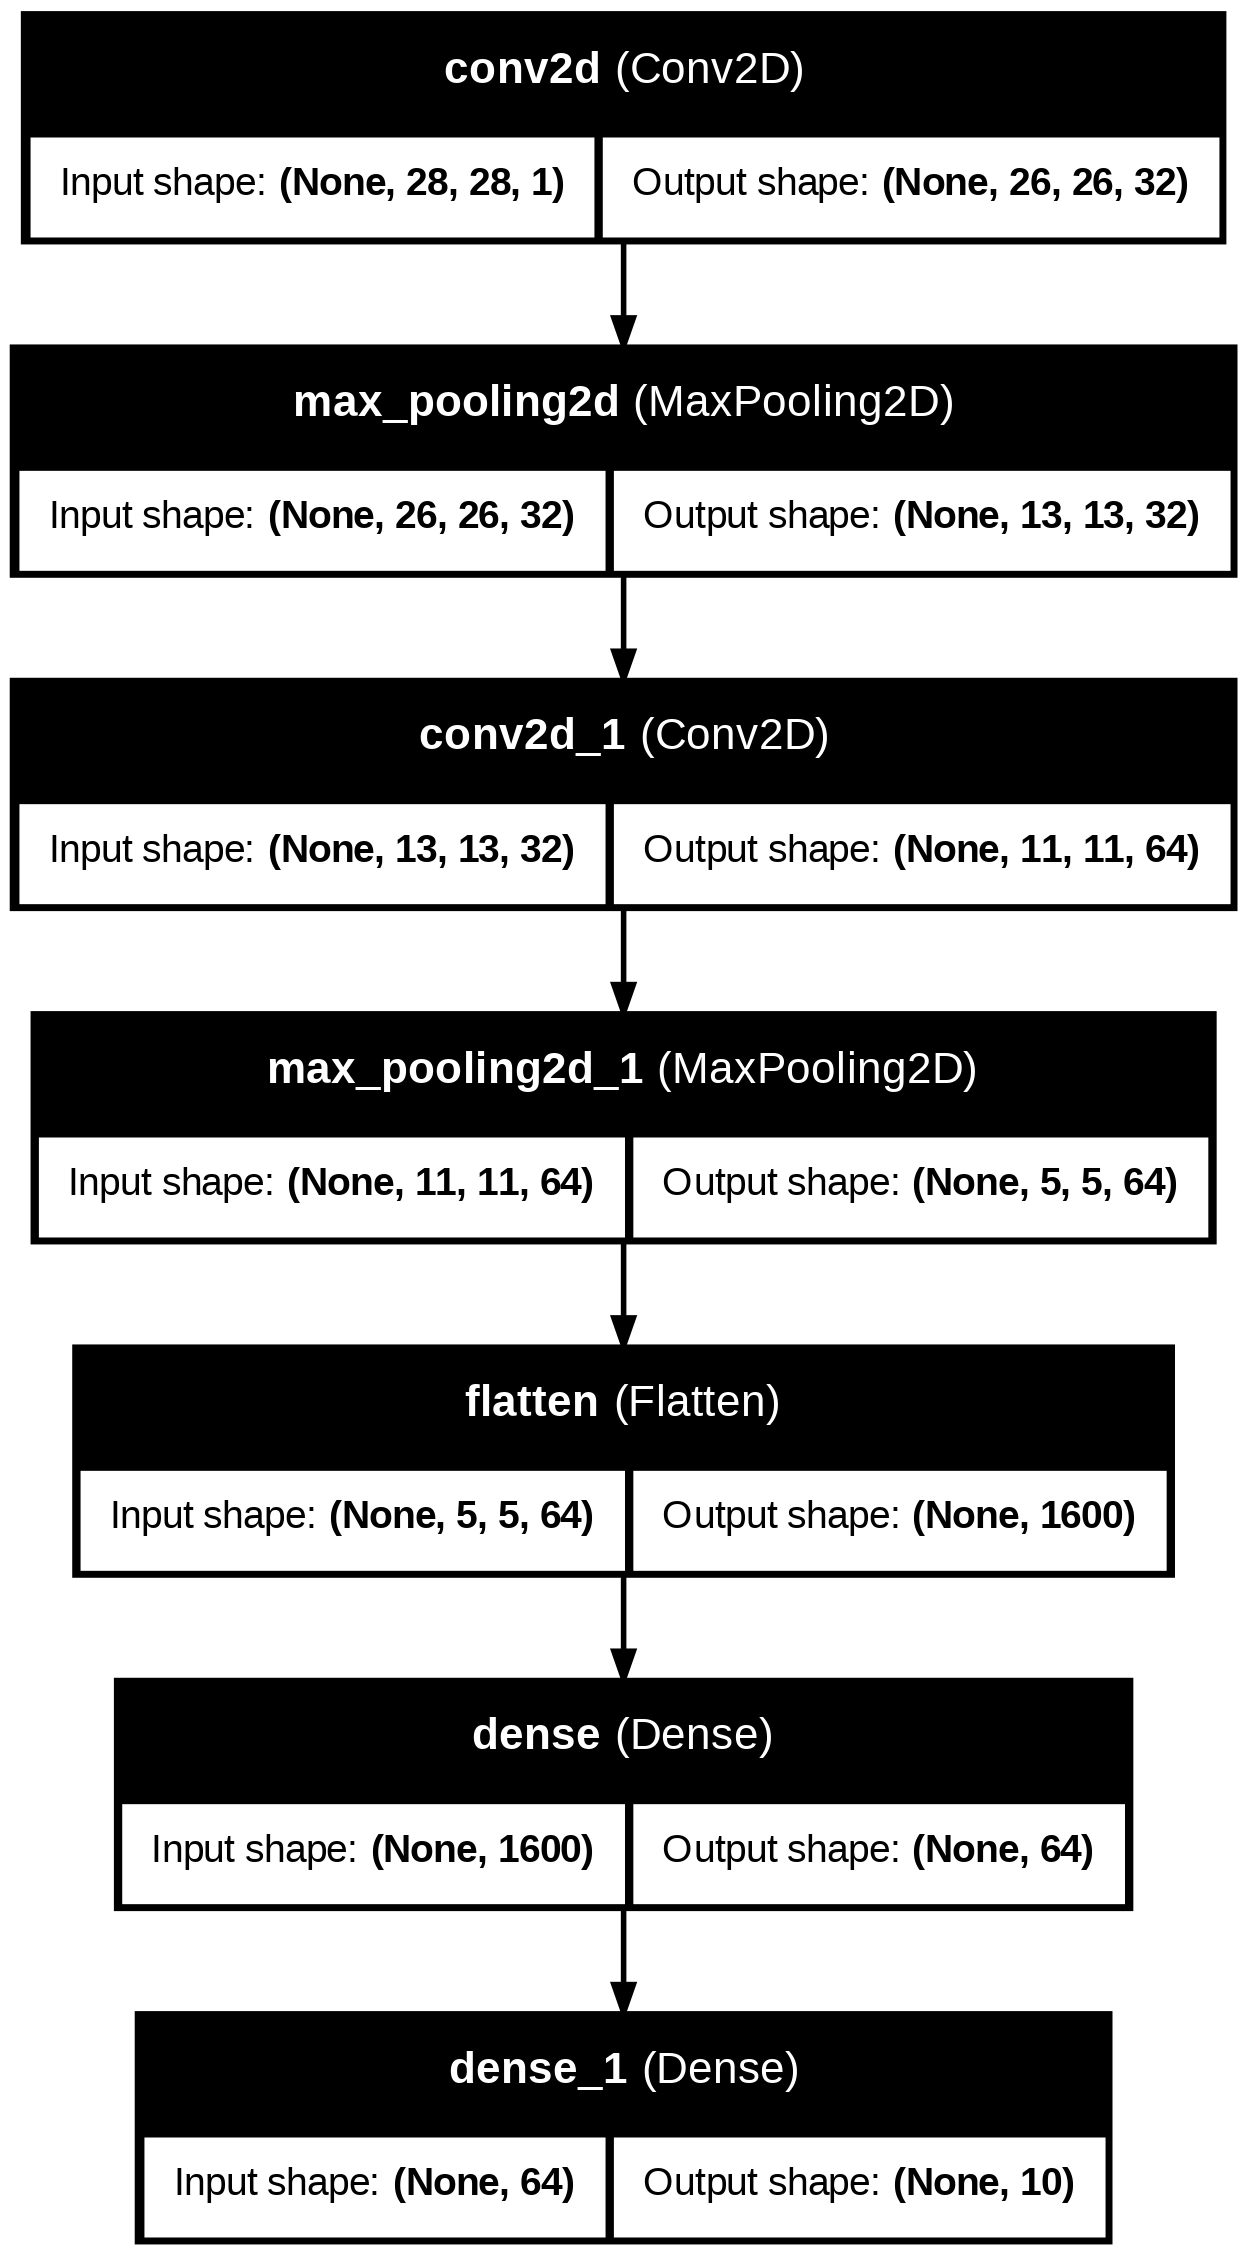

In [2]:
import tensorflow as tf
import pydot

tf.keras.utils.plot_model(model, to_file='model_layers.png', show_shapes=True, show_layer_names=True)